In [11]:
!pip3 install pandas
!pip3 install regex
!pip3 install contractions
!pip3 install tqdm
!pip3 install scikit-learn
!pip3 install numpy
!pip3 install gensim
!pip3 install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 7.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
#importing the data
df = pd.read_csv("/Downloads/X_train.csv")
train_labels = pd.read_csv("y_train.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Downloads/X_train.csv'

In [ ]:
df.shape

(40000, 1)

In [ ]:
df.isnull().sum()

review    0
dtype: int64

In [ ]:
df.review[1]

"I know it's rather unfair to comment on a movie without seeing the complete piece - but I am going to anyway! I waited for a laugh, I tried to give it time. I think 20 minutes is long enough to wait in a comedy for a laugh. My laugh never came, so I gave up.<br /><br />It's stupid humour, not so stupid that you have to laugh, though. It isn't anywhere near that high grade. Let me correct that, it's just *stupid* - not stupid humour. They may have intended for certain scenes to be funny, but they weren't. I suppose, if you were really bored you could somehow blend the movie with a hallucination and end up with a mildly entertaining experience.<br /><br />A very pathetic effort."

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


In [7]:
import string
df = df.replace('\n',' ', regex=True)
df = df.replace(r'\\n',' ', regex=True)

NameError: name 'df' is not defined

In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import regex as re
import contractions
stopwords = ENGLISH_STOP_WORDS

In [9]:
from tqdm import tqdm
processed_body = []
for i in tqdm(df['review']):
    #Regular expression that removes all the html tags pressent in the body
    i=re.sub('(<[\w\s]*/?>)'," ",i)
    #Expanding all the contractions present in the body to is respective actual form
    i=contractions.fix(i)
    #Removing all the special charactesrs from the review text
    i=re.sub('[^a-zA-Z0-9\s]+'," ",i)
    #Removing all the digits present in the body text
    i=re.sub('\d+'," ",i)
    i=re.sub(' +', ' ', i)
    
        
    #Making all the  text to be of lower case as well as remvoing the stopwords and words of length less than 3
    processed_body.append(" ".join([j.lower().translate(str.maketrans('', '', string.punctuation)) for j in i.split() if j not in stopwords and len(j)>=3]))


NameError: name 'df' is not defined

In [ ]:
processed_body[1]

'know unfair comment movie seeing complete piece going waited laugh tried time think minutes long wait comedy laugh laugh came gave stupid humour stupid laugh near high grade let correct just stupid stupid humour they intended certain scenes funny suppose really bored blend movie hallucination end mildly entertaining experience pathetic effort'

In [ ]:
processed_df  = pd.DataFrame({'reviews': processed_body})

In [ ]:
processed_df

,reviews
0,shame swedish film swedish english subtitles t...
1,know unfair comment movie seeing complete piec...
2,bread sharply skewers conventions horror movie...
3,after reading tons good reviews movie decided ...
4,during civil war wounded union soldier hides i...
...,...
39995,pagan say movie little magickal significance f...
39996,lot comments treat film baseball movie feel se...
39997,seen series leave background noise dorm fan me...
39998,the dollars wedding ring scene riot guffawed s...


In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

- Since it is text data, each word is a feature, the sparse matrix representation has, 89k features, which might not be relevant for clustering & classificcation model
- We use SelectKBest method from sklearn, along with chi2 as the scoring function, to select, 50,000 most important features. 
- We trained model with different k values for selecting best features, ranging in [50000 -> 1000].
- TSVD is PCA for sparse data

In [133]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(binary=True)),
    ('tfidf', TfidfTransformer()),
    ('scaler', MaxAbsScaler()),
#     ('selector', SelectKBest(chi2, k=50000)),
    ('TSVD', TruncatedSVD(n_components=250))
])

In [134]:
x_train = processed_df.reviews.values
x_train = pipeline.fit_transform(x_train, train_labels)

# Code to Decide Number of Clusters

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [118]:
max_clusters= [5,15,25,50,75,500]
silhouette_scores = [] 
for i in max_clusters:
  kmeans = KMeans(n_clusters=i,max_iter=300, random_state=42)
  kmeans.fit_predict(x_train)
# Store silhouette score of each means iteration
  silhouette_scores.append(silhouette_score(x_train, kmeans.labels_))
  print(silhouette_scores)

[-0.015357264967433884]
[-0.015357264967433884, -0.037518967781438144]
[-0.015357264967433884, -0.037518967781438144, -0.03614885623179287]
[-0.015357264967433884, -0.037518967781438144, -0.03614885623179287, -0.04282312058092654]
[-0.015357264967433884, -0.037518967781438144, -0.03614885623179287, -0.04282312058092654, -0.053305679465274716]
[-0.015357264967433884, -0.037518967781438144, -0.03614885623179287, -0.04282312058092654, -0.053305679465274716, -0.06719914345614093]


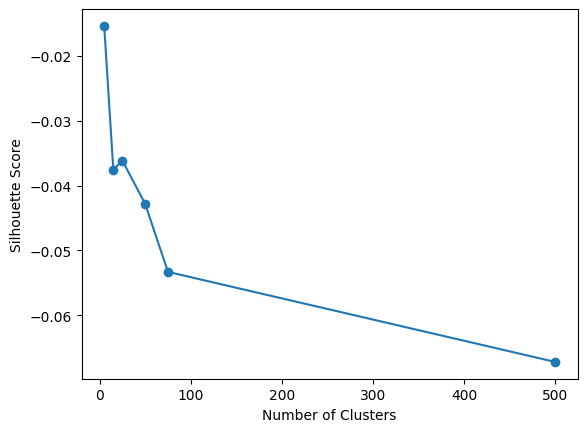

In [119]:
plt.plot(max_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [172]:
kmeans = KMeans(n_clusters=75, init='k-means++',max_iter=500, random_state=42)
# Predict the cluster labels for each data point
X_digits_dist = kmeans.fit_transform(x_train)
y_train = kmeans.labels_


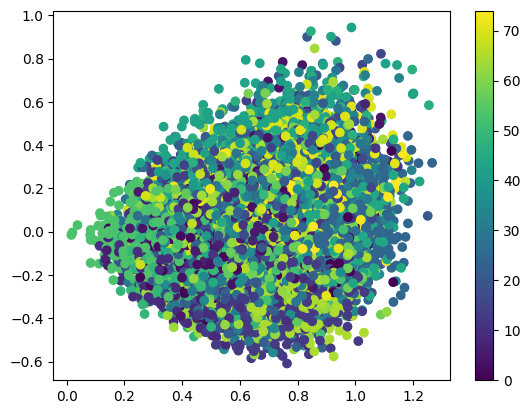

In [173]:
x_train_reduced = tsvd.fit_transform(x_train)

# Plot the reduced x_train against y_train
plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=y_train)
plt.colorbar()
plt.show()

In [138]:
# Get labels for each data point
cluster_labels = kmeans.labels_
Y = train_labels.sentiment


- 

In [139]:
# Create a new DataFrame to hold the data points and their cluster labels
df_labeled = pd.DataFrame(x_train)
df_labeled['Cluster_Label'] = cluster_labels
df_labeled['Original_Label'] = Y

# Determine the most common label within each cluster
representative_labels = df_labeled.groupby('Cluster_Label')['Original_Label'].agg(lambda x:x.value_counts().index[0]).to_dict()

# Map the cluster labels to representative labels
df_labeled['Representative_Label'] = df_labeled['Cluster_Label'].map(representative_labels)


In [140]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 253 entries, 0 to Representative_Label
dtypes: float64(250), int32(1), int64(2)
memory usage: 77.1 MB


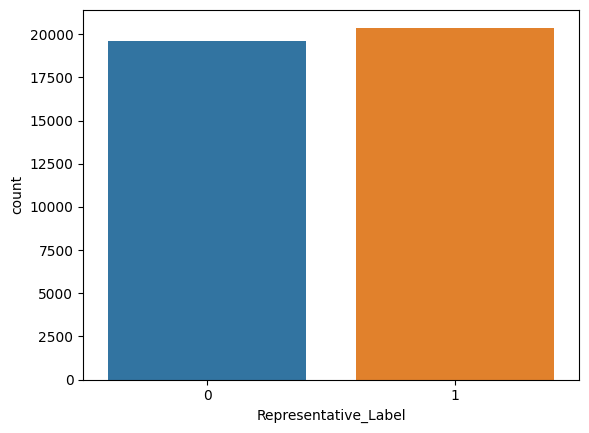

In [141]:
import seaborn as sns


sns.countplot(x='Representative_Label', data=df_labeled)

plt.show()

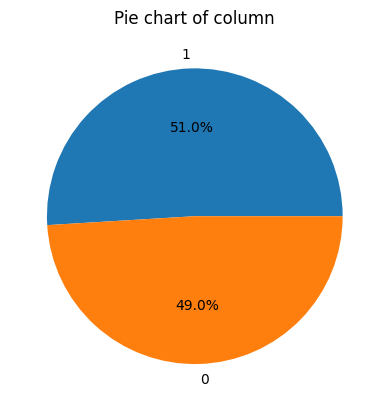

In [142]:
import matplotlib.pyplot as plt

# Assume df is your DataFrame and 'column' is the column for which you want to create a pie chart
counts = df_labeled['Representative_Label'].value_counts()

plt.pie(counts, labels = counts.index, autopct='%1.1f%%')
plt.title('Pie chart of column')
plt.show()


In [143]:
x_train

array([[ 0.71496034, -0.16003276,  0.09132104, ..., -0.09118701,
        -0.03127902,  0.04396622],
       [ 0.73825737,  0.46099698, -0.09523411, ...,  0.03617703,
        -0.08738798,  0.04782909],
       [ 0.39052848, -0.03404052,  0.10416008, ...,  0.01402722,
        -0.03245938,  0.0188511 ],
       ...,
       [ 0.40448022,  0.13113386, -0.08533938, ..., -0.0080109 ,
         0.05140475, -0.01808012],
       [ 0.4191552 ,  0.1103625 , -0.18095408, ...,  0.02503219,
         0.02080739,  0.0552498 ],
       [ 0.59270367,  0.26096944, -0.04211611, ..., -0.10762445,
         0.03392627,  0.05373465]])

In [144]:
# Use the df_labeled to train the classification model
# SUPERVISED
ss_df = df_labeled[[0, 'Representative_Label']]

In [145]:
# Do train test split here for cross validation of the model

from sklearn.model_selection import train_test_split
dX_train, dX_test, dy_train, dy_test = train_test_split(x_train, 
                                                        ss_df['Representative_Label'],
                                                        test_size=0.2,
                                                        random_state=100
                                                       )

In [146]:
dX_train

array([[ 6.19292793e-01, -3.77299771e-01,  8.33127355e-03, ...,
         1.53759614e-02,  1.00459082e-01,  7.75243688e-02],
       [ 7.07594878e-01, -1.76033019e-01, -2.24272870e-03, ...,
        -6.91621033e-02,  8.32729701e-02,  4.35055143e-02],
       [ 5.11474015e-01, -2.92402470e-01,  6.58274059e-02, ...,
        -6.46810981e-02, -6.01830614e-02, -2.94721855e-02],
       ...,
       [ 5.65189444e-01, -8.20751371e-02,  3.21329306e-01, ...,
        -6.34489299e-02,  4.14504104e-04,  9.89098226e-03],
       [ 6.20624641e-01,  2.89588091e-01,  1.24651954e-01, ...,
        -9.73726146e-02,  1.13842599e-01, -8.73701190e-02],
       [ 5.88793519e-01,  1.84239737e-01, -1.01496416e-01, ...,
        -5.32746630e-02,  1.71831038e-02,  1.95266066e-02]])

In [147]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg = log_reg.fit(dX_train, dy_train)

In [148]:
log_reg_score = log_reg.score(dX_test, dy_test)
print(f'Score: {log_reg_score:.2%}')

Score: 80.85%


### CROSS VALIDATION

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(comp=5):
    
    modeling_pipeline = Pipeline([
         ('pca', PCA(n_components=5)),
         ('model', LogisticRegression(penalty=None))
        ]
    )

    return modeling_pipeline


In [33]:
from sklearn.model_selection import cross_validate

clf = generate_estimates()
cv_results = cross_validate(clf, dX_train.toarray(), dy_train, 
                            scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], 
                            cv=5, 
                            error_score='raise')

cv_results

{'fit_time': array([5.03179812, 5.35694003, 5.13882422, 5.13218808, 5.1659019 ]),
 'score_time': array([0.06450891, 0.03425789, 0.02848697, 0.03856897, 0.03222609]),
 'test_accuracy': array([0.7584375 , 0.76890625, 0.7665625 , 0.76578125, 0.76078125]),
 'test_recall': array([0.7553719 , 0.77652893, 0.76099174, 0.75595238, 0.76917989]),
 'test_precision': array([0.73924296, 0.74524112, 0.74910511, 0.75024614, 0.73630896]),
 'test_f1_macro': array([0.75796089, 0.76862534, 0.76604155, 0.76516066, 0.76050592]),
 'test_roc_auc': array([0.84016279, 0.84816191, 0.84844635, 0.84605149, 0.84213986])}

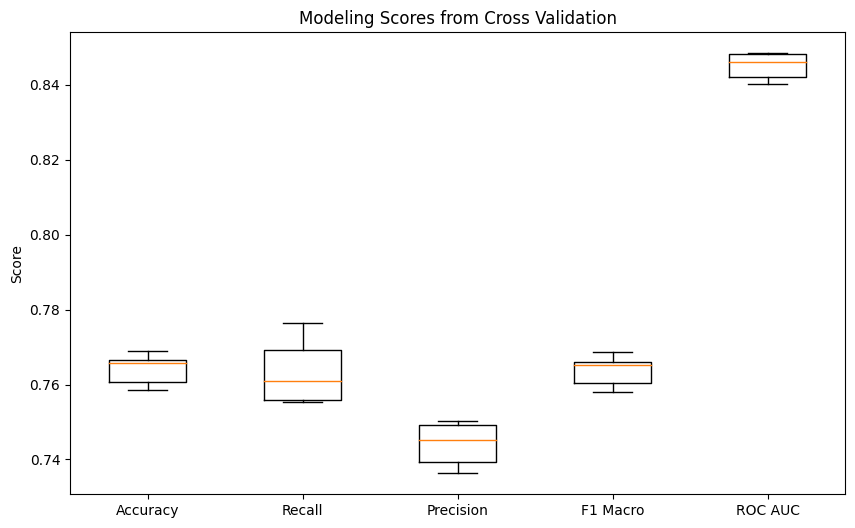

In [34]:
import matplotlib.pyplot as plt


accuracy = cv_results['test_accuracy']
recall = cv_results['test_recall']
precision = cv_results['test_precision']
f1_macro = cv_results['test_f1_macro']
roc_auc = cv_results['test_roc_auc']


all_scores = [accuracy, recall, precision, f1_macro, roc_auc]
metric_names = ['Accuracy', 'Recall', 'Precision', 'F1 Macro', 'ROC AUC']

plt.figure(figsize=(10, 6))
plt.boxplot(all_scores)
plt.title('Modeling Scores from Cross Validation')
plt.xticks(range(1, len(metric_names) + 1), metric_names)
plt.ylabel('Score')
plt.show()


# Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression(solver='liblinear')
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(dX_train, dy_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.4f}')


Best parameters: {'C': 1, 'penalty': 'l1'}
Best score: 0.8879


Hyperparameter Tuned Logistic Regression

### TESTING ON THE PRODUCTION DATASET

#### pre-processing the dataset

In [149]:
df_test = pd.read_csv("X_final.csv")
test_labels = pd.read_csv("y_final.csv")

In [150]:
df_test

,review
0,I first saw Heimat 2 on BBC2 in the 90's when ...
1,"I sat down to watch ""Midnight Cowboy"" thinking..."
2,I can never fathom why people take time to rev...
3,"With that line starts one silly, boring Britis..."
4,"Here's the spoiler: At the end of the movie, a..."
...,...
9995,"""Protocol"" is a hit-and-miss picture starring ..."
9996,"In the same vein as Natural Born Killers, anot..."
9997,"A sadly inferior precursor to ""Who's Afraid of..."
9998,"a real hoot, unintentionally. sidney portier's..."


In [151]:
import string
df_test= df_test.replace('\n',' ', regex=True)
df_test = df_test.replace(r'\\n',' ', regex=True)

In [152]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import regex as re
import contractions
stopwords = ENGLISH_STOP_WORDS

In [153]:
from tqdm import tqdm
processed_body_test = []
for i in tqdm(df_test['review']):
    #Regular expression that removes all the html tags pressent in the body
    i=re.sub('(<[\w\s]*/?>)'," ",i)
    #Expanding all the contractions present in the body to is respective actual form
    i=contractions.fix(i)
    #Removing all the special charactesrs from the review text
    i=re.sub('[^a-zA-Z0-9\s]+'," ",i)
    #Removing all the digits present in the body text
    i=re.sub('\d+'," ",i)
    i=re.sub(' +', ' ', i)
    
        
    #Making all the  text to be of lower case as well as remvoing the stopwords and words of length less than 3
    processed_body_test.append(" ".join([j.lower().translate(str.maketrans('', '', string.punctuation)) for j in i.split() if j not in stopwords and len(j)>=3]))


100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 4642.54it/s]


In [154]:
processed_df_test  = pd.DataFrame({'reviews': processed_body_test})

In [155]:
processed_df_test

,reviews
0,saw heimat bbc art college living moving artis...
1,sat watch midnight cowboy thinking overrated m...
2,fathom people time review movies understood fu...
3,with line starts silly boring british sci film...
4,here spoiler end movie little piece dies you s...
...,...
9995,protocol hit miss picture starring goldie hawn...
9996,vein natural born killers movie popular critic...
9997,sadly inferior precursor who afraid virginia w...
9998,real hoot unintentionally sidney portier chara...


In [157]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(binary=True)),
    ('tfidf', TfidfTransformer()),
    ('scaler', MaxAbsScaler()),
#     ('selector', SelectKBest(chi2, k=50000)),
    ('TSVD', TruncatedSVD(n_components=250))
])

In [158]:
x_test = processed_df_test.reviews.values
x_test = pipeline.fit_transform(x_test,test_labels)

### Logistic Regression

In [159]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = log_reg.predict(x_test)

# Generate classification report
report = classification_report(test_labels, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.54      0.56      0.55      5000
           1       0.54      0.51      0.53      5000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000



### Support Vector Machine

In [160]:
from sklearn.svm import SVC

# Define the model
svm = SVC(kernel='linear')

# Fit the model to the training data
svm.fit(dX_train, dy_train)

# Calculate the accuracy of the model on the test data
svm_score = svm.score(dX_test, dy_test)

# Print the accuracy
print(f'Training Score: {svm_score:.2%}')


Training Score: 80.91%


In [161]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = svm.predict(x_test)

# Generate classification report
report = classification_report(test_labels, y_pred)

print('Testing Score: \n',report)


Testing Score: 
               precision    recall  f1-score   support

           0       0.54      0.56      0.55      5000
           1       0.54      0.51      0.53      5000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000



### Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit the model to the training data
rf.fit(dX_train, dy_train)

# Calculate the accuracy of the model on the test data
rf_score = rf.score(dX_test, dy_test)

# Print the accuracy
print(f' Training Score: {rf_score:.2%}')


 Training Score: 76.94%


In [171]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = rf.predict(x_test)

# Generate classification report
report = classification_report(test_labels, y_pred)

print('Testing Report: \n', report)


Testing Report: 
               precision    recall  f1-score   support

           0       0.53      0.73      0.62      5000
           1       0.57      0.35      0.44      5000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.53     10000
weighted avg       0.55      0.54      0.53     10000



- Using PCA worked better than SelectKBest
- Generating labels from clustering might have introduced class imbalance
- SVC performed better than other models
- Visual representations are necessary for clustering but might be deceiving,
so what’s most critical is to calculate the right statistical and quantifiable
metrics to ensure minimum sum squared error and ensure maximum
separation between the clusters.
- When dealing with language you have lots of semantics and complexity to it as compared to numeric data, there is a potential of losing semantic meaning as we drop features causing the model to underperform.
- We can try a neural network based model to train the sentiment analysis model so that text features could be better represented over the neural layer and much complex classification boundaries can be learned by the model.
- The model might get confused when there is very similarity between two inputs, as text input can be very high adjacency in vector representation of sentiment.